# PAIR PROGRAMMING - MODULO 3 - LECCION 10- A/B TESTING

In [1]:

# Importación de las librerías necesarias

# Tratamiento de datos
import pandas as pd
import numpy as np
 
# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables y la distribución de las variables
import scipy.stats as stats
from scipy.stats import shapiro, levene, mannwhitneyu
from scipy.stats import ttest_ind, norm, chi2_contingency

# Configuración
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
import warnings
warnings.filterwarnings("ignore")

Ejercicio 1:
Supongamos que estamos realizando un experimento para determinar si un nuevo diseño de anuncio (test group "ad") tiene un impacto significativo en la tasa de conversión en comparación con el diseño de anuncio anterior (test group "psa").

Objetivo del ejercicio: Comparar las tasas de conversión entre los grupos de prueba "ad" y "psa" para determinar si el nuevo diseño de anuncio es más efectivo en la conversión de usuarios.

Pasos que debemos seguir:

Preparación de los datos: Asegúrate de que los datos estén limpios y listos para el análisis. Esto incluye la eliminación de datos faltantes y la verificación de la coherencia de los datos.

In [2]:
df_pair10 = pd.read_csv("marketing_AB.csv", index_col = 0)

In [3]:
df_pair10.isnull().sum()

user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [4]:
df_pair10.duplicated().sum()

0

In [5]:
df_pair10

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...
588096,1278437,ad,False,1,Tuesday,23
588097,1327975,ad,False,1,Tuesday,23
588098,1038442,ad,False,3,Tuesday,23
588099,1496395,ad,False,1,Tuesday,23


In [6]:
# Cambio nombre columnas
df_pair10.columns = df_pair10.columns.str.replace(" ", "_")

In [7]:
df_pair10.describe()

,user_id,total_ads,most_ads_hour
count,5.881010e+05,588101.000000,588101.000000
mean,1.310692e+06,24.820876,14.469061
std,2.022260e+05,43.715181,4.834634
min,9.000000e+05,1.000000,0.000000
25%,1.143190e+06,4.000000,11.000000
50%,1.313725e+06,13.000000,14.000000
75%,1.484088e+06,27.000000,18.000000
max,1.654483e+06,2065.000000,23.000000


Definición de las hipótesis: Plantea una hipótesis nula (H0) y una hipótesis alternativa (H1) para el experimento (en este caso os las damos definidas):



In [8]:
# Hipótesis nula (H0): No hay diferencia significativa en la tasa de conversión entre los grupos de prueba "ad" y "psa".
# Hipótesis alternativa (H1): Existe una diferencia significativa en la tasa de conversión entre los grupos de prueba "ad" y "psa".

Cálculo de la tasa de conversión: Calcula la tasa de conversión para cada grupo:

- Para el grupo "ad", la tasa de conversión es el número de usuarios convertidos dividido por el número total de usuarios en ese grupo.

- Para el grupo "psa", realiza el mismo cálculo.

In [9]:
tabla = pd.crosstab(df_pair10["test_group"], df_pair10["converted"], normalize="index")
tabla

converted,False,True
test_group,,
ad,0.974453,0.025547
psa,0.982146,0.017854


Prueba de hipótesis: Utiliza una prueba estadística, como la prueba t de Student o la prueba chi-cuadrado, para comparar las tasas de conversión entre los grupos "ad" y "psa".

Hipótesis:
- Hipotesis nula- H0: no hay diferencia
- Hipotesis alternativa- H1: si hay diferencia

Si p_valor < 0.05 ---> rechazamos H0, si hay diferencia.

Si p_valor >0.05 ---> aceptamos H0, no hay difreenica. 

In [10]:
# Prueba chi-cuadrado
chi2, p_value, _, _ = chi2_contingency(tabla)
print(p_value)

1.0


Análisis de resultados:

-Si el valor p es menor que un umbral predefinido (por ejemplo, 0.05), rechazamos la hipótesis nula y concluimos que hay una diferencia significativa en las tasas de conversión entre los grupos.

-Si el valor p es mayor que el umbral, no podemos rechazar la hipótesis nula y concluimos que no hay evidencia suficiente para afirmar que hay una diferencia significativa.

Conclusiones y recomendaciones: Basándote en los resultados de la prueba de hipótesis, llega a una conclusión sobre si el nuevo diseño de anuncio es más efectivo en la conversión de usuarios que el diseño anterior. Si es así, puedes hacer recomendaciones basadas en estos hallazgos.

In [11]:
# El p_value es menor a 0.05 lo que indica que rechazamos H0, ya que si hay diferencia significativa entre los dos grupos.
# El nuevo diseño si que es mas efectivo que el anterior, ya que en la tabla de contingencia observamos que un mayor numero de usuarios que se convierten gracias al nuevo diseño.

Ejercicio 2:
En este caso, vamos a realizar un experimento para comparar la cantidad promedio de anuncios vistos por los usuarios en los grupos "ad" y "psa" y determinar si hay una diferencia significativa entre ellos.

Objetivo del experimento: Comparar la cantidad promedio de anuncios vistos por usuario entre los grupos de prueba "ad" y "psa" para determinar si el tipo de anuncio afecta la cantidad de anuncios que los usuarios ven.

Preparación de los datos: Asegúrate de que los datos estén limpios y listos para el análisis. Esto incluye la eliminación de datos faltantes y la verificación de la coherencia de los datos.

Hipótesis: Plantea una hipótesis nula (H0) y una hipótesis alternativa (H1) para el experimento. En este caso, las deberéis plantear vosotras

Prueba de hipótesis: Utiliza una prueba estadística, como la prueba t de Student, para comparar la cantidad promedio de anuncios vistos por usuario entre los grupos "ad" y "psa". Esto te permitirá determinar si hay una diferencia significativa entre los dos grupos.

Análisis de resultados:

Si el valor p (p-value) es menor que un umbral predefinido (por ejemplo, 0.05), rechazamos la hipótesis nula y concluimos que hay una diferencia significativa en la cantidad promedio de anuncios vistos por usuario entre los grupos.

Si el valor p es mayor que el umbral, no podemos rechazar la hipótesis nula y concluimos que no hay evidencia suficiente para afirmar que hay una diferencia significativa.

Conclusiones y recomendaciones: Basándote en los resultados de la prueba de hipótesis, llega a una conclusión sobre si el tipo de anuncio (ad o psa) tiene un impacto significativo en la cantidad promedio de anuncios vistos por usuario. Si es así, puedes hacer recomendaciones basadas en estos hallazgos.

In [12]:
# Hipótesis: 
# Hipótesis nula (H0): El anuncio actual funciona mejor.
# Hipótesis alternativa (H1): El anuncio nuevo funciona mejor.

In [13]:
df_pair10["total_ads"]

0         130
1          93
2          21
3         355
4         276
         ... 
588096      1
588097      1
588098      3
588099      1
588100      1
Name: total_ads, Length: 588101, dtype: int64

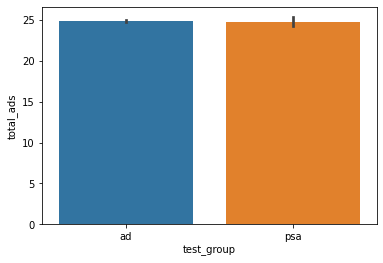

In [14]:
sns.barplot(x = "test_group", y = "total_ads", data = df_pair10);

In [15]:
# Calculamos la media de "ad" y "psa"
ad_mean = df_pair10[df_pair10["test_group"] == "ad"]['total_ads'].mean()
psa_mean = df_pair10[df_pair10["test_group"] == "psa"]['total_ads'].mean()
print(f"Media de ad: {round(ad_mean,2)}")
print(f"Media de psa: {round(psa_mean,2)}")

Media de ad: 24.82
Media de psa: 24.76


In [16]:
# NORMALIDAD: Prueba Shapiro
_,p_value = shapiro(df_pair10['total_ads'])
print(f"p-Value: {p_value}")

p-Value: 0.0


In [17]:
# El p value de la prueba Shapiro es extremadamente bajo lo cual indica que hay evidencia significativa para rechazar la hipótesis nula: los datos no siguen una distribucion normal.

In [18]:
# Prueba estadística no paramétrica: test de Mann-Whitney

In [19]:
grupo_ad = df_pair10[df_pair10["test_group"] == "ad"]
grupo_psa = df_pair10[df_pair10["test_group"] == "psa"]

In [20]:
u_statistic, p_value = stats.mannwhitneyu(grupo_ad['total_ads'], grupo_psa['total_ads'])
        
if p_value < 0.05:
    print(f"Las medianas son significativamente diferentes.")
else:
    print(f"Las medianas no son significativamente diferentes.")

Las medianas son significativamente diferentes.


In [21]:
# Las medianas de los dos grupos son significativamente diferentes. 

In [22]:
# HOMOGENEIDAD DE VARIANZAS: Prueba de levene
statistic, p_value = stats.levene(grupo_ad['total_ads'], grupo_psa['total_ads'])
if p_value > 0.05:
    print(f"Las varianzas son homogéneas entre grupos.")
else:
    print(f"Las varianzas no son homogéneas entre grupos.")

Las varianzas no son homogéneas entre grupos.


In [23]:
# Prueba t student
t_stat, p_value = ttest_ind(grupo_ad['total_ads'], grupo_psa['total_ads'], equal_var=False)

print("Prueba t para comparar los dos grupos:")
print(f"Estadística de prueba (t): {t_stat}")
print(f"Valor p: {p_value}")

Prueba t para comparar los dos grupos:
Estadística de prueba (t): 0.2179969144923846
Valor p: 0.8274332524963001


In [24]:
# El p_value es mayor que 0.05 lo que indica que no hay evidencia suficiente para rechazar H0. No podemos afirmar que haya un diferenci significativa entre las dos muestras.